# Simulate.ipynb
***
<br>

# Programming for Data Analysis 2021 - Project  

## Author - Ross Downey (G00398275)

## Lecturer - Dr. Brian McGinley
***

![](https://pbs.twimg.com/profile_images/697093982724210688/S2wJ6pg2_400x400.jpg)

## Aim
***
<br>

The aim of this project is to simulate a real world phenomenon that can be measured, which one hundred data points could be collected across different variables. In this case I have chosen a number of famous horse races across the world. Types of variables involved with succesful horses in these races will be investigated, such as age, weight, rating, experience etc. The likely distributions of these variables will be simulated (based on previous trends) and also their relationships with each other will be examined.  
A dataset will then be simualted based on these variables' distributions in an attempt to predict the attributed of horses likely to be successful in these races.


## Python Packages
***
<br>

A number of python packages will be used over the course of this notebook. They are briefly summarized below

### Numpy
![](https://neuraspike.com/wp-content/uploads/2020/11/thumbnail_numpy_tutorial_logo-neuraspike.png.png)  
Numpy, or numerical Python, is a library used in Python to create different types of arrays or multi-dimensional matrices, and includes a large collection of mathematical functions to operate on these arrays.[1]. In this case Numpy will be used to simulate data using the numpy.random package based on certain mathematical distributions.  

### Matplotlib
![](https://miro.medium.com/max/1400/0*Q2P7piuSxFQIq60Z.jpg)  
Matplotlib is a plotting library used in python to create visual plots from data. [2]. For this case Matplotlib will be used to create certain plots to help present large amounts of numerical data, generated using Numpy, in a clear and concise manner using histograms, charts etc.  

### Seaborn  
![](https://files.ai-pool.com/a/21155149cb560f48f085a21264277c3c.png)  
Seaborn is also a plotting library used in Python. It is based on Matplotlib, but in this author's opinion can yield more visually appealing plots than Matplotlib in certain cases.

In [2]:
# Importing numpy for numerical arrays
import numpy as np

# For plotting
import matplotlib.pyplot as plt

# Also for plotting
import seaborn as sns

## Background
***
Horse racing is a widely popular sport in many countries throughout the world. The basic premise is racing horses against each other over different conditions (distances, obstacles, surfaces etc.) to determine which is the fastest. Horse racing has been performed for thousands of years throughout the world in a variety of formats. There are records of horse races in Ancient Roman and Greek literature (particulary chariot races). [3]  From the 1400s to the 1800s a horse race closed the traditional Spring festival in Rome where riderless horses, imported from Africa, were raced along the Via del Corso (a long straight street).  Subsequent to this type of horse racing, the sport gained popularity with British royalty and aristocracy, earning it the title of "The Sport of Kings". This title has been maintained to this day, with a certain element of "high society" involved in owning and managing large stables and thoroughbreds worth millions of Euro.  
The sport also gained huge popularity with the working class, particular in terms of wagering on the outcomes of horse races. Bookmakers, or "bookies", will set certain odds on horses based on their perceived chances of winning, or placing (second, third, fourth etc.) and customers, or "punters" will place money with the bookmaker in an attempt to win money from the bookmaker based on the outcome of the races.  
The bookmaking component is likely the main reason for the ubiquitous popularity of the sport. The prohibitive cost of owning and maintaing horses, espcially thoroughbreds used in high profile races, prevents nealry all but the wealthy elite from becoming involved as owners. However, having money on a horse in a race, and the possibility of winning money on the outcome of these races, allows any person (provided they are over the permitted gambling age of 18...) have a level of interest. 

![](https://www.starsportsbet.co.uk/wp-content/uploads/2017/03/starring.jpg)  

The wagering element of horse racing is a big business. It is estimated that over $100 billion dollars annually is bet on horse races throughout the world.[4] The most popular horse race to gamble on is the English Grand National, run at Aintree racecourse every April. Approximately £300 million is bet on this race alone each year [5] , a staggering amount.  
There is also a prize fund given for winnning or placing (second, third, fourth etc.) to the winning owners, trainers, and jockeys. The prize fund for the English Grand National is in the region of £1 million pounds. [6]  I will discuss further details of this race, and others in subsequent sections.
Needless to say, when there is so much money (and prestige) involved in these races, having a statistical analysis to help predict a succesful entrant could prove very lucrative.  
For each horse race the bookmaker will set odds based on the chance or likelihood that the horse will finish the race in first position. These odds are usually in a fraction format such as 2/1 (two to one) or 13/2 (thirteeen to two) for example. This means that for every one euro bet the bookmaker will return two if the horse wins, or in the case of 13/2, for every two euro placed the bookmaker will return thirteen. There are also returns possible if the horse finishes second / third / fourth in a race. This is called placing in a race. Usually the bookmaker wil offer a quarter or a fifth of the odds for a horse, depending on the number of horses in a race. This type of bet, known as "each-way" costs more to put on (double a normal bet) as the bookmaker is offering more chances to win in the case of this bet.  
How the bookmaker sets these odds on each horse will be part of the focus of this notebook. The bookmaker will set odds based on what they perceive the chances of a horse being succesful in a race. There are a number of factors that can govern the decisions made to offer certain odds on a horse. These include, but are not limited to, the horse's age, the weight the horse is carrying, the official rating given to the horse, the experience of the horse, the condition of the ground on the racecourse, the stall the horse starts the race in etc.  
For the purposes of this project I will attempt to build a simulation model for a number of horse races based on previous winners' attributes, and simulate what are the optimum variable values for a horse to be succesful in these races. The first race I will attempt to build a simulation model is the English Grand National, also known as the Aintree Grand National

## Aintree Grand National
***
<br>
The Aintree Grand National (as the name suggests) is run at Aintree racecourse, near Liverpool, England, every April. It is probably the most famous horse race in the world and attract the largest number of bettors each year. First run in 1839, it is run over four miles and thirty fences, and is a gruelling test of horses' stamina and jockey's bravery. [6]  It is the most valuable horse race, terms of prize money offered, in Europe with a prize fund of £1 million pounds, and as stated previously, approximately £300 million pounds is wagered on this race alone each year.  
Many would argue that luck is the deciding factor in a race like this. With so many horses, running such a large distance, and clearing thirty or so jumps it is true that to be succesful in this race there is an element of luck involved. For example, if a horses is clearing a jump just behind another one, should the horse in front fall it is likely that they could bring down the trailing horse. However, I hope to show that there are certain attributes a horse can possess which can give them a far greater chance of success. I will now proceed to discuss each type of attribute and start to simulate data points using numpy.random based on these attributes.

### Age
***
<br>

The age of the horse is one of the most important variables in this race. A novice, or inexperienced, horse has slim chance of managing to run over four miles and thirty fences succesfully. Conversely, as the race is such a gruelling test of stamina, an older horse with many miles on the clock so to speak is unlikely to make the distance in front of a younger, fresher horse. Those of us who attempted to play sport into their thirties can relate to this when facing younger opponents in their late teens, or early twenties... As suggested, there is a certain age range where a horse is far more likely to be successful in this race. A horse does not start their jump racing career until they are two or three years old (they are classed juveniles in this case), and cannot compete in the Aintree Grand National until they are at least seven years old. This age limit was set in 2011 following a number of fatal fallers in previous years. Prior to this a six year old horse had not won in the Grand National since 1915. [7]
An examination of previous winners of this race will give an indication of the optimum age range a horse should be, and the type of distribution that should be applied when simulating data. Although there has been over 150 runnings of this race, there have been a number of rule and condition changes over the years. Consequently, for the purposes of this exercise I will examine the previous twenty events to help build a representative sample. [8]  
The age profile of the previous twenty winners are as follows:  

- 0 have been seven years of age
- 5 have been eight years of age
- 4 have been nine years of age
- 5 have been ten years of age
- 4 have been eleven years of age
- 1 has been twelve years of age
- 0 have been thirteen years of age  

This indicates while there is not an optimum single age, there is definitely a range of eight years to eleven where the horse needs to be to have a decent chance of successful. Interestingly the numbers appear to be almost evenly distributed across this range. Consequently, the best distribution to use for this variable is the uniform distribution. The uniform distribution is used when each variable has an equal probability of being generated by numpy.random.  
For the purposes of this project i will simulate 200 outcomes for each variable. 

In [6]:
# Adapted from Numpy.random official documentation [9]
# Defining the random number generator
rng = np.random.default_rng()
# Setting the variables, min 8, max 11, 200 variables
age = rng.integers(low=8, high=11, size=200)
age

array([ 9,  8,  9,  9, 10,  9,  8, 10,  8,  8, 10,  9,  9,  9, 10,  9,  9,
        8,  9,  8, 10,  9, 10, 10,  8,  8,  9,  9,  9,  8, 10,  9,  9,  8,
        8,  8,  9,  9, 10,  9, 10,  9,  8,  9,  9, 10, 10,  9,  9,  8, 10,
        9, 10,  9,  9, 10,  8,  8,  9,  8,  8,  8,  9,  9, 10,  8,  8,  8,
       10,  9,  9,  8,  8, 10,  8, 10,  9, 10,  8,  8,  8,  8, 10,  9, 10,
        8,  8,  8,  8,  8, 10,  9,  9, 10, 10,  9,  9, 10,  9, 10,  8,  9,
       10,  8,  8,  8,  9,  8,  9,  9, 10,  9,  9, 10,  9,  8, 10,  8,  9,
        8, 10,  8,  9,  8,  9,  8,  8,  9, 10,  8,  8,  9,  8,  8,  9,  8,
       10, 10,  9,  9,  8,  9,  8,  8,  8, 10,  8,  9,  8, 10, 10, 10,  8,
       10,  8, 10, 10,  9,  8, 10, 10, 10, 10,  9,  8,  8,  8, 10, 10,  8,
        9,  8, 10,  9,  9,  8,  8,  8,  9,  9,  9, 10,  8,  8,  9, 10,  9,
        8,  8, 10,  8,  8,  9, 10, 10, 10,  9, 10, 10, 10], dtype=int64)

As is typically the case in large arrays generated using numpy, it is best to demonstrate these using plots instead of just showing the array itself.

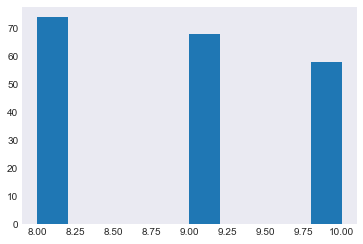

In [7]:
# Set the default plot style
plt.style.use('seaborn-dark')
# Plotting
plt.hist(age)
plt.show()

## References
***
<br>

[1] https://en.wikipedia.org/wiki/NumPy  
[2] https://en.wikipedia.org/wiki/Matplotlib  
[3] https://en.wikipedia.org/wiki/Horse_racing  
[4] https://en.wikipedia.org/wiki/Betting_on_horse_racing  
[5] https://www.independent.co.uk/sport/racing/grand-national-2019-prize-money-how-much-winner-earn-aintree-latest-a8856996.html  
[6] https://en.wikipedia.org/wiki/Grand_National  
[7] https://www.theguardian.com/sport/2011/nov/02/minimum-age-grand-national-runners  
[8] https://en.wikipedia.org/wiki/List_of_Grand_National_winners  
[9] https://numpy.org/doc/stable/reference/random/index.html  
[10] 